In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Addition of a bunch of gaussians

(0, 1)

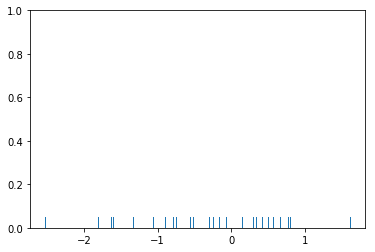

In [4]:
# Manual KDE plot
# start with rug plot

dataset = randn(25)
sns.rugplot(dataset)
plt.ylim(0,1)

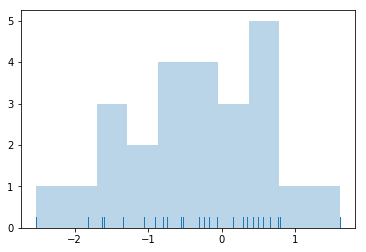

In [5]:
plt.hist(dataset,alpha=.3)
sns.rugplot(dataset)

(0, 1)

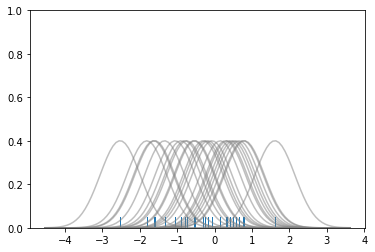

In [8]:
sns.rugplot(dataset)
x_min = dataset.min()-2
x_max = dataset.max()+2
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ( (4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = .4*kernel
    
    plt.plot(x_axis,kernel,color='grey',alpha = .5)
    
plt.ylim(0,1)

Text(0.5,0.98,'Sum of the basis function')

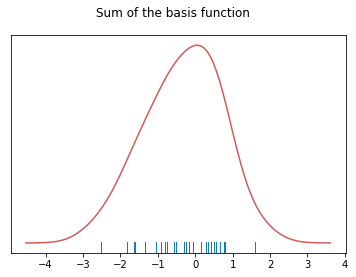

In [10]:
# Sum everything for KDE

sum_of_kde = np.sum(kernel_list,axis = 0)
fig = plt.plot(x_axis, sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis function")

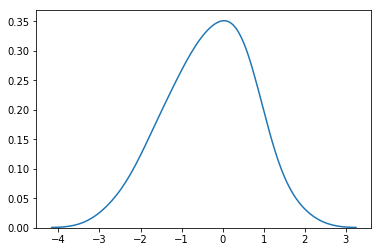

In [11]:
# shortened version

sns.kdeplot(dataset)

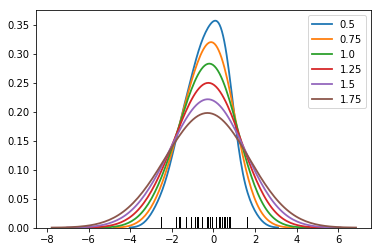

In [12]:
# adjust sensitivity

sns.rugplot(dataset,color='black')
for bw in np.arange(.5,2,.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

In [13]:
# Differnet kernels (look up kernel statistics)

In [14]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

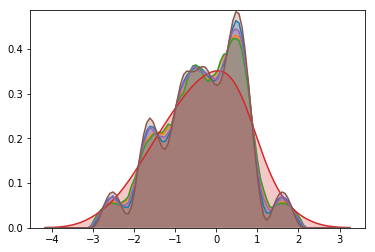

In [18]:
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, shade=True)

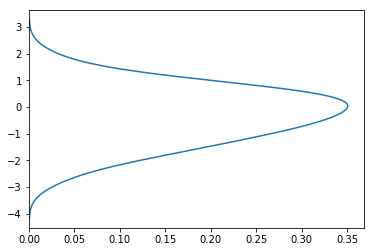

In [19]:
sns.kdeplot(dataset, vertical=True)

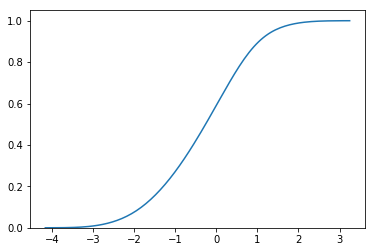

In [20]:
# create CDF

sns.kdeplot(dataset,cumulative=True)

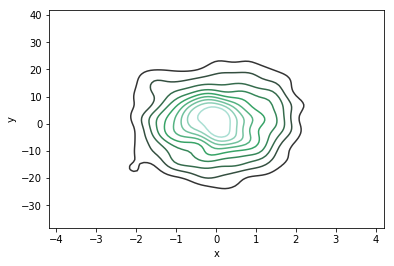

In [22]:
# multivariant

mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['x','y'])

sns.kdeplot(dframe['x'],dframe['y'])

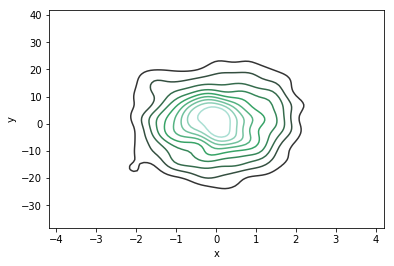

In [24]:
sns.kdeplot(dframe.x,dframe.y)

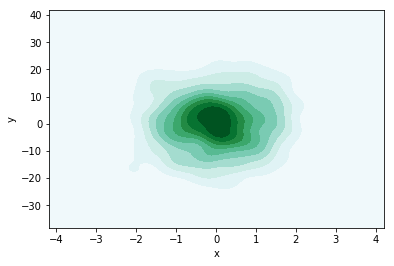

In [25]:
sns.kdeplot(dframe.x,dframe.y,shade=True)

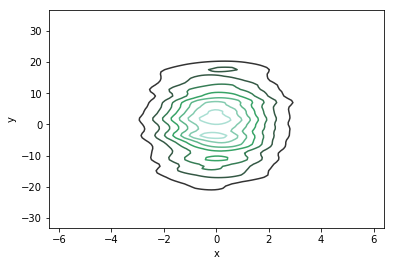

In [26]:
# specifiy bandwidths

sns.kdeplot(dframe.x,dframe.y,bw=1)

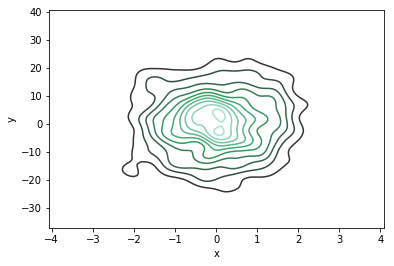

In [27]:
sns.kdeplot(dframe.x,dframe.y,bw='silverman')

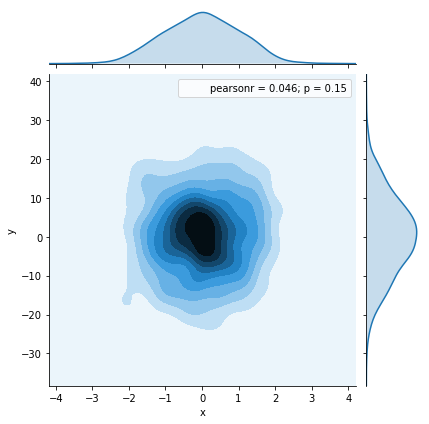

In [28]:
sns.jointplot('x','y',dframe,kind='kde')